In [1]:
##Given a Model, find the indices that correspond to a particular scale. 
#Then, reconstruct the model at that scale. Do calculations if needed.
####SETUP

Database_Path = '../rem3d/files/'
N = 7
Jmax = 4
WaveletBasisFn = 'D4'
eo =0
EulerConfig = 1
ModelName = 'MIT_P08'
NumVals = int(6)*int(2)**(int(2)*int(N))
SC = 1
####################################################
depths = []
counter = 0
xcorrcoeffs = []
corrdepths = []
pvals = []
####################################################
##########
#Options to do different operations in the script.
The_Chosen_Depth = 25
The_Chosen_Depth = 6371-The_Chosen_Depth
Scale_List = [1,2,3,4,5]

##########
#importing standard modules
import math
import os
import glob
import re
import matplotlib.pyplot as plt
import numpy as np
import subprocess as sub
import shutil
import sys
import scipy as sci
import scipy.io as sio
%matplotlib inline
from scipy.sparse import csr_matrix, rand
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
from matplotlib.pyplot import register_cmap,get_cmap,colorbar
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
####################       IMPORT PM's MODULES     ######################################
from plottingPM import get_colors,grayify_cmap,make_colormap,customcolorpalette
from drawmapsection3D import get_distaz,delazgc_helper,writejson,readjson, \
    plot_hotspots,plot_plates,plot_gcpaths,get_fullpath,sanitised_input,uniquenumpyrow

####More Setup for File Names
##Naming Conventions
if SC == 1:
    DVBasisName = 'Mmaps.'+ 'N' + str(N) + '.J' + str(Jmax) + '.' + WaveletBasisFn + '.mat'
    WaveletCoeffBasisName = 'SC_WCoeffs.' + 'N'+str(N) + '.J' + str(Jmax) + '.' + \
                            WaveletBasisFn + '.mat'
    GridName= 'SC_'+'Grid_N' + str(N) + '_Jmax' + str(Jmax) + \
              '_EulerConfig' + str(EulerConfig) + '.mat'
    VeloName = 'SC_' + ModelName + '.N' + str(N) + '.Jmax' + str(Jmax) +  \
              '.EulerConfig' + str(EulerConfig) + '.mat'
else:
    DVBasisName = 'Mmaps.'+ 'N' + str(N) + '.J' + str(Jmax) + '.' + WaveletBasisFn + '.mat'
    WaveletCoeffBasisName = 'VWCoeffs.' + 'N'+str(N) + '.J' + str(Jmax) + '.' + \
                            WaveletBasisFn + '.mat'
    GridName= 'Grid_N' + str(N) + '_Jmax' + str(Jmax) + \
              '_EulerConfig' + str(EulerConfig) + '.mat'
    VeloName =  ModelName + '.N' + str(N) + '.Jmax' + str(Jmax) +  \
              '.EulerConfig' + str(EulerConfig) + '.mat'   


####Read the .mat files.
WaveletBasis = sio.loadmat(Database_Path + DVBasisName)
WaveletCoeffBasis = sio.loadmat(Database_Path + WaveletCoeffBasisName)
Grids = sio.loadmat(Database_Path + GridName)
ModelFile = sio.loadmat(Database_Path + VeloName)
####
#Declare some variables
Vvals = ModelFile['model']
wvcoeffs = ModelFile['wvcoeffs']
Depths = ModelFile['depth']
Depth_List = np.unique(Depths)
Depth_List = np.flip(Depth_List,0)
Depth_List = np.array([The_Chosen_Depth])

################################
###Setup the iterations over here. 


Scale_Interest = Scale_List

print(Scale_Interest)

[1, 2, 3, 4, 5]


NameError: name 'face' is not defined

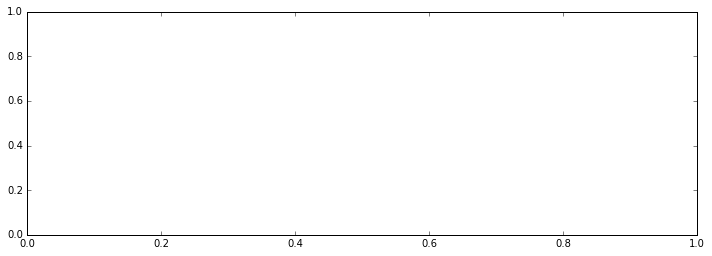

In [2]:
Nbasis = len(WaveletBasis['Me'][0,:])
fig = plt.figure(figsize=(12, 4), dpi=300, facecolor='w')
ax = fig.add_subplot(111)

for iii in range(5):
    
    

    Test = Vvals[0,:]
    Test.flatten()
    N = Grids['MetaN'][0][0]
    ScaleIndex = Grids['ScaleIndex'][0][0]
        #print ScaleIndex
    Jmax = Grids['MetaJmax'][0][0]
    lonwav = Grids['lon'][face*Nbasis:(face+1)*Nbasis]
    latwav = Grids['lat'][face*Nbasis:(face+1)*Nbasis]


        # Define a colorscale
    #    colormax=np.amax(abs(value)) #(-colormax,colormax) are the limits of the colorbar
    colormax= 0.5
    greylimit=0.001*colormax  #this is the limit to which the middle color (grey) will extend on either side of colorttmax mid
    name='r_lgrey_b'
    c = colors.ColorConverter().to_rgb
    colorlist=[c('red'), c('lightgray'), (2.*colormax-2.*greylimit)/(4.*colormax), c('lightgray'),c('lightgray'), (2.*colormax+2.*greylimit)/(4.*colormax), c('lightgray'),c('blue'), 1., c('blue')]
    custom_cmap = make_colormap(colorlist,name)
    register_cmap(name=custom_cmap.name, cmap=custom_cmap)
    palette=custom_cmap.name

    colorVal=get_colors(val=value,xmin=-colormax,xmax=colormax,palette=palette)
    #print colorVal.shape,value.shape,lonwav.shape


        # Make the figure

    m = Basemap(projection='robin', lon_0=0,resolution='c',ax=ax)
    m.drawcoastlines()
    x, y = m(lonwav,latwav); 
    cm = get_cmap(palette)
    #    sc = ax.scatter(x, y, c=colorVal, vmin=-colormax, vmax=colormax, edgecolor= '', cmap=cm)
    sc = ax.scatter(x, y, c=colorVal, vmin=-2, vmax=2, edgecolor= '', cmap=cm)

        # Set title

    titlestr='N='+str(N)+', Jmax='+str(Jmax)+ ',Depth='+str(6371-Depth_Interest)+',Scales Used:'+str(Scale_Interest)#'+str(face+1),
    ax.set_title(titlestr,fontsize=12)

        # draw parallels and meridians.
        # labels = [left,right,top,bottom]
    parallels = np.arange(-60,90,30.)
    m.drawparallels(parallels,labels=[False,True,False,False])
    meridians = np.arange(0.,360.,90.)
    m.drawmeridians(meridians,labels=[False,False,False,True])


In [12]:
len(Vvals[0,:])

2850816

In [13]:
int(2850816/30

95027